In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sn


In [2]:
# read HR-Employee-Attrition file
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.tsv.txt", sep='\t')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# drop the columns not required and create new Data set
to_drop = ['BusinessTravel', 'DailyRate', 'DistanceFromHome','EmployeeCount',
          'EmployeeNumber', 'JobLevel', 'MonthlyRate',
          'NumCompaniesWorked', 'Over18','PercentSalaryHike', 'PerformanceRating',
          'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear',
          'YearsInCurrentRole']
cdf = df.drop(to_drop, axis = 1)
cdf



,Age,Attrition,Department,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Sales,2,Life Sciences,2,Female,94,3,Sales Executive,4,Single,5993,Yes,8,1,6,0,5
1,49,No,Research & Development,1,Life Sciences,3,Male,61,2,Research Scientist,2,Married,5130,No,10,3,10,1,7
2,37,Yes,Research & Development,2,Other,4,Male,92,2,Laboratory Technician,3,Single,2090,Yes,7,3,0,0,0
3,33,No,Research & Development,4,Life Sciences,4,Female,56,3,Research Scientist,3,Married,2909,Yes,8,3,8,3,0
4,27,No,Research & Development,1,Medical,1,Male,40,3,Laboratory Technician,2,Married,3468,No,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,2,Medical,3,Male,41,4,Laboratory Technician,4,Married,2571,No,17,3,5,0,3
1466,39,No,Research & Development,1,Medical,4,Male,42,2,Healthcare Representative,1,Married,9991,No,9,3,7,1,7
1467,27,No,Research & Development,3,Life Sciences,2,Male,87,4,Manufacturing Director,2,Married,6142,Yes,6,3,6,0,3
1468,49,No,Sales,3,Medical,4,Male,63,2,Sales Executive,2,Married,5390,No,17,2,9,0,8


In [4]:
#checking null values
cdf.isnull().sum()

Age                        0
Attrition                  0
Department                 0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
Gender                     0
HourlyRate                 0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
OverTime                   0
TotalWorkingYears          0
WorkLifeBalance            0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [5]:
#checking types
cdf.dtypes


Age                         int64
Attrition                  object
Department                 object
Education                   int64
EducationField             object
EnvironmentSatisfaction     int64
Gender                     object
HourlyRate                  int64
JobInvolvement              int64
JobRole                    object
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
OverTime                   object
TotalWorkingYears           int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

In [6]:
cdf.describe()

,Age,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,2.912925,2.721769,65.891156,2.729932,2.728571,6502.931293,11.279592,2.761224,7.008163,2.187755,4.123129
std,9.135373,1.024165,1.093082,20.329428,0.711561,1.102846,4707.956783,7.780782,0.706476,6.126525,3.222430,3.568136
min,18.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,48.000000,2.000000,2.000000,2911.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,3.000000,3.000000,66.000000,3.000000,3.000000,4919.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,4.000000,4.000000,83.750000,3.000000,4.000000,8379.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,5.000000,4.000000,100.000000,4.000000,4.000000,19999.000000,40.000000,4.000000,40.000000,15.000000,17.000000


In [7]:
# Total number of Employee Attrition
total_emp_att = cdf.Attrition.value_counts()
total_emp_att

No     1233
Yes     237
Name: Attrition, dtype: int64

In [8]:
# Percentage of 'Attrition' unique value 
per_att = cdf.Attrition.value_counts()/len(df)*100
per_att

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

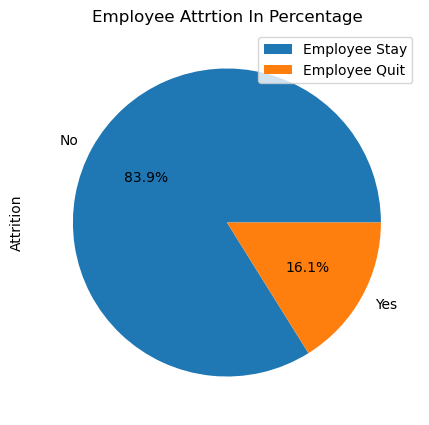

In [9]:
# Generate a pie plot showing the percentages of employee quit and employee stay
plot = per_att.plot.pie(autopct="%1.1f%%", subplots=True, figsize=(5,5), labels=per_att.index.values)
plt.title("Employee Attrtion In Percentage")
plt.legend(["Employee Stay", "Employee Quit"])
plt.show()


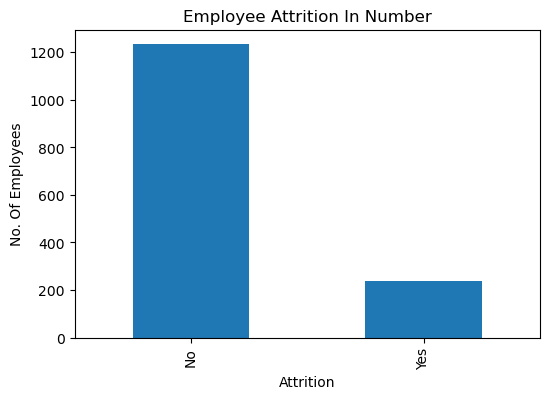

In [10]:
plot1 = total_emp_att.plot(kind="bar", figsize=(6,4))
plt.xlabel("Attrition")
plt.ylabel("No. Of Employees")
plt.title("Employee Attrition In Number")
plt.show()

In [11]:
x = cdf.duplicated(subset=['Attrition', 'Gender'])
dup_att = cdf.loc[(x), "Attrition"].unique()
dup_att

array(['No', 'Yes'], dtype=object)

In [12]:
# cdf['Attrition'] = np.where(cdf['Attrition']=='Yes',1,0)

In [13]:
dup_att_df = cdf.loc[ cdf["Attrition"] == "Yes", :]
dup_att_df

,Age,Attrition,Department,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Sales,2,Life Sciences,2,Female,94,3,Sales Executive,4,Single,5993,Yes,8,1,6,0,5
2,37,Yes,Research & Development,2,Other,4,Male,92,2,Laboratory Technician,3,Single,2090,Yes,7,3,0,0,0
14,28,Yes,Research & Development,3,Life Sciences,3,Male,50,2,Laboratory Technician,3,Single,2028,Yes,6,3,4,0,3
21,36,Yes,Sales,4,Life Sciences,3,Male,82,2,Sales Representative,1,Single,3407,No,10,3,5,0,3
24,34,Yes,Research & Development,1,Medical,2,Male,83,3,Research Scientist,1,Single,2960,No,8,3,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Sales,3,Marketing,4,Male,33,3,Sales Representative,1,Married,1790,No,1,2,1,1,0
1442,29,Yes,Research & Development,4,Medical,1,Male,36,3,Research Scientist,4,Married,4787,Yes,4,4,2,2,2
1444,56,Yes,Research & Development,2,Technical Degree,4,Male,72,3,Laboratory Technician,3,Married,2339,No,14,1,10,9,8
1452,50,Yes,Sales,4,Life Sciences,2,Male,94,3,Sales Executive,3,Divorced,6728,No,12,3,6,0,1


In [14]:
# Convert the "Department" column to numeric so the data can be used
dep_df = dup_att_df.groupby(['Department'])
sdf = dep_df['Department'].count()
sdf

Department
Human Resources            12
Research & Development    133
Sales                      92
Name: Department, dtype: int64

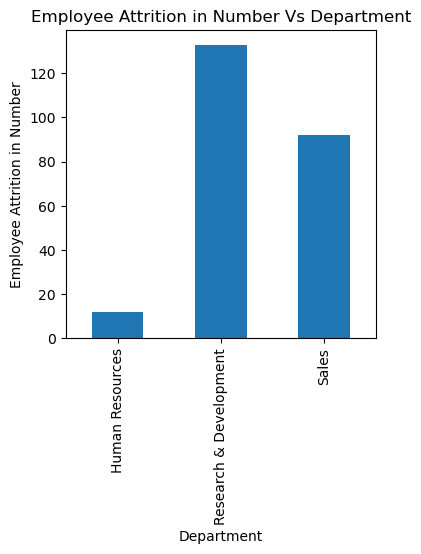

In [15]:
dep_chart = sdf.plot(kind='bar', figsize=(4,4))
# Set the xlabel and ylabel using class methods
dep_chart.set_xlabel("Department")
dep_chart.set_ylabel("Employee Attrition in Number")
plt.title("Employee Attrition in Number Vs Department" )
plt.show()


In [16]:
Gen_att = cdf.Gender.value_counts()/len(df)*100
Gen_att

Male      60.0
Female    40.0
Name: Gender, dtype: float64

In [17]:
dep_df = cdf.groupby('Department')
sdf = dep_df['Department'].count()
dup_att_df.corr()

,Age,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.192184,-0.030219,0.112644,0.070830,0.031509,0.500602,0.672621,-0.075944,0.452909,0.329246,0.336577
Education,0.192184,1.000000,-0.037230,0.023586,0.112600,-0.075939,0.105162,0.170176,-0.102884,0.157490,0.141172,0.132882
EnvironmentSatisfaction,-0.030219,-0.037230,1.000000,-0.021467,0.093255,0.046915,-0.089457,-0.058569,-0.099402,0.031420,0.104580,0.000282
HourlyRate,0.112644,0.023586,-0.021467,1.000000,0.067985,-0.124763,0.018204,0.030602,-0.071140,0.015526,-0.088223,-0.011530
JobInvolvement,0.070830,0.112600,0.093255,0.067985,1.000000,-0.047079,-0.008321,0.011386,0.040517,-0.026785,0.032574,0.026431
JobSatisfaction,0.031509,-0.075939,0.046915,-0.124763,-0.047079,1.000000,0.004767,-0.002202,-0.042071,0.095849,0.091455,0.005296
MonthlyIncome,0.500602,0.105162,-0.089457,0.018204,-0.008321,0.004767,1.000000,0.742277,0.002965,0.634973,0.476264,0.485162
TotalWorkingYears,0.672621,0.170176,-0.058569,0.030602,0.011386,-0.002202,0.742277,1.000000,-0.027637,0.767402,0.535388,0.571150
WorkLifeBalance,-0.075944,-0.102884,-0.099402,-0.071140,0.040517,-0.042071,0.002965,-0.027637,1.000000,-0.032627,-0.051754,-0.049469
YearsAtCompany,0.452909,0.157490,0.031420,0.015526,-0.026785,0.095849,0.634973,0.767402,-0.032627,1.000000,0.702128,0.769296


In [20]:
job_means = cdf.groupby("Attrition" ).mean()
job_means = round(job_means, 2)
job_means

,Age,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,
No,37.56,2.93,2.77,65.95,2.77,2.78,6832.74,11.86,2.78,7.37,2.23,4.37
Yes,33.61,2.84,2.46,65.57,2.52,2.47,4787.09,8.24,2.66,5.13,1.95,2.85


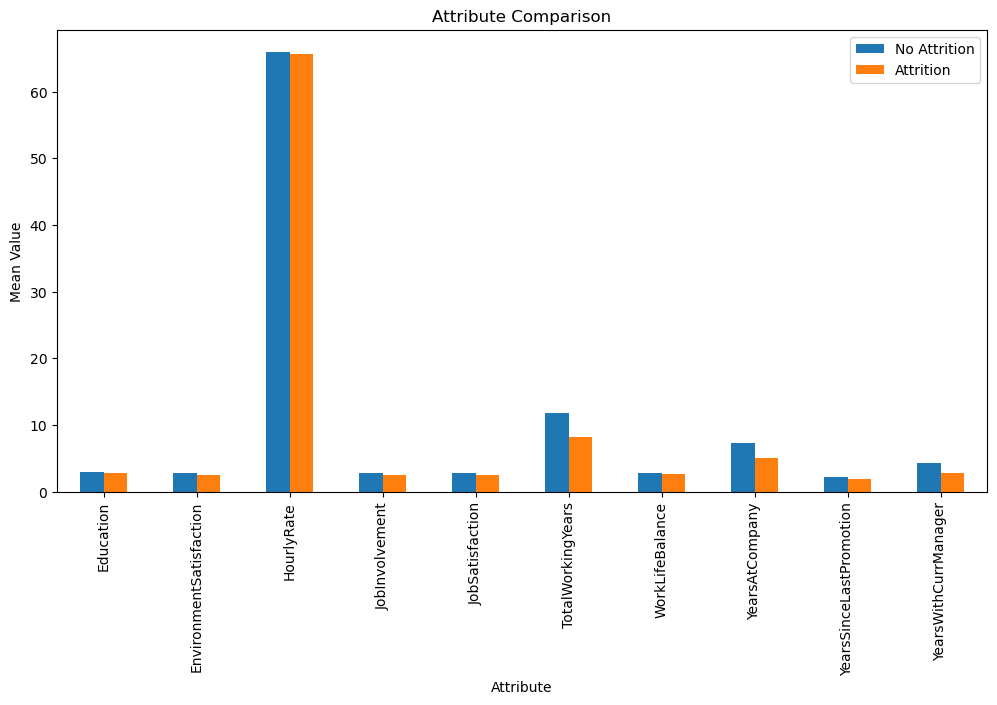

In [33]:
at_df = pd.DataFrame({'Attribute': ['Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
                   'No Attrition': [2.93, 2.77, 65.95, 2.77, 2.78, 11.86, 2.78, 7.37, 2.23, 4.37],
                   'Attrition': [2.84, 2.46, 65.57, 2.52, 2.47, 8.24, 2.66, 5.13, 1.95, 2.85]})

# Plot the data as a bar graph
at_df.set_index("Attribute", inplace=True)
at_df.plot(kind='bar', figsize=(12,6), stacked=False, width = 0.5)
 
plt.title("Attribute Comparison")
plt.xlabel("Attribute")
plt.ylabel("Mean Value")
plt.legend(loc='best')
plt.show()
